<a href="https://colab.research.google.com/github/gchn24/DS-Notes/blob/main/Day_111_Confidence_Interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
from scipy.stats import norm
import numpy as np
import seaborn as sns

## Purchase time

The average time taken for customers to complete a purchase is 4 minutes with a standard deviation of 1 minute. Find the probability that a randomly selected customer will complete a purchase within 6 minutes? Assume Gaussian

In [ ]:
norm.cdf((6-4)/1)

0.9772498680518208

What is the probability that the average time of the next 5 customers is less than 6 minutes?

In [ ]:
norm.cdf((6 - 4) / (1/np.sqrt(5)))

0.9999961278917845

## Purchase amount

The average order value on an e-commerce website is 50, with a standard deviation of 5. What is the probability that a randomly selected order will have a value exceeding 60?

In [ ]:
1 - norm.cdf((60-50)/(5))

0.02275013194817921

In [ ]:
1 - norm.cdf((60-50)/(5/np.sqrt(3)))

0.00026600275256960515

# Confidence Interval using CLT

## Height example

#### from sample
The mean height of a sample of 100 adults was found to be 65 inches,
with a standard deviation of 2.5 inches.

In [ ]:
std_error = 2.5/np.sqrt(100)
std_error

0.25

In [ ]:
z1 = norm.ppf(0.025) # z-multiplier
z1

-1.9599639845400545

In [ ]:
z2 = norm.ppf(0.975)
z2

1.959963984540054

In [ ]:
x1 = 65 + z1 * std_error
x1

64.51000900386498

In [ ]:
x2 = 65 + z2 * std_error
x2

65.48999099613502

The 95% confidence interval --> [64.51, 65.49]

In [ ]:
(65, [x1,x2])

(65, [64.51000900386498, 65.48999099613502])

## Recovery days

The sample mean recovery time of 100 patients after taking a drug was seen to be 10.5 days with a standard deviation of 2 days. Find the 95% confidence interval of the true mean.

In [ ]:
std_error = 2/np.sqrt(100)
std_error

0.2

In [ ]:
z1 = norm.ppf(0.025)
x1 = 10.5 + z1 * std_error
x1

10.108007203091988

In [ ]:
z2 = norm.ppf(0.975)
x2 = 10.5 + z2 * std_error
x2

10.89199279690801

In [ ]:
[x1, x2]

[10.108007203091988, 10.89199279690801]

# Confidence Interval using Bootstrap

In [ ]:
survey_1 = [35, 36, 33, 37, 34, 35]
np.mean(survey_1)

35.0

In [ ]:
survey_2 = [20, 37, 17, 50, 53, 33]
np.mean(survey_2)

35.0

In [ ]:
np.random.choice(survey_1, size = 3)

array([35, 34, 33])

In [ ]:
n = 6
# Sample with replacement
bootstrapped_samples  = np.random.choice(survey_1, size = n)
bootstrapped_samples.mean()


36.0

In [ ]:
bootstrapped_means_survey_1 = []

for reps in range(10000):
    bootstrapped_samples = np.random.choice(survey_1, size=n)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_survey_1.append(bootstrapped_mean)

In [ ]:
len(bootstrapped_means_survey_1)

10000

In [ ]:
bootstrapped_means_survey_1[:5]

[35.333333333333336,
 35.666666666666664,
 34.333333333333336,
 34.833333333333336,
 35.166666666666664]

In [ ]:
bootstrapped_means_survey_2 = []
for reps in range(100000):
    bootstrapped_samples = np.random.choice(survey_2, size=n)
    bootstrapped_mean = np.mean(bootstrapped_samples) # Replace by any statistic (median, percentile)
    bootstrapped_means_survey_2.append(bootstrapped_mean)

In [ ]:
survey_1

[35, 36, 33, 37, 34, 35]

In [ ]:
bootstrapped_samples  = np.random.choice(survey_1, size = n)
bootstrapped_samples.mean()


35.0

<Axes: ylabel='Count'>

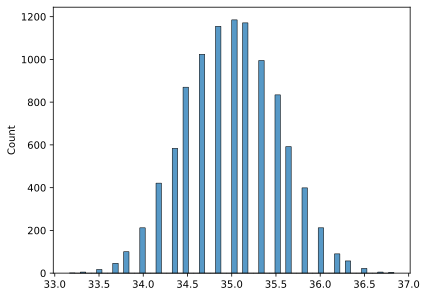

In [ ]:

sns.histplot(bootstrapped_means_survey_1)

In [ ]:
survey_2

[20, 37, 17, 50, 53, 33]

In [ ]:
bootstrapped_samples  = np.random.choice(survey_2, size = n)
bootstrapped_samples.mean()


34.833333333333336

<Axes: ylabel='Count'>

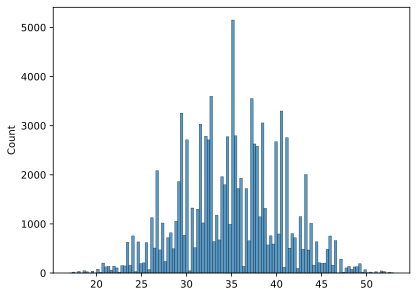

In [ ]:
sns.histplot(bootstrapped_means_survey_2)

<Axes: ylabel='Count'>

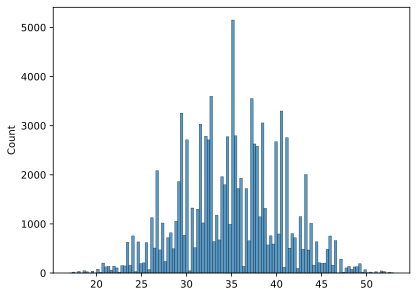

In [ ]:
sns.histplot(bootstrapped_means_survey_2)

In [ ]:
bootstrapped_means_survey_1

[35.333333333333336,
 35.666666666666664,
 34.333333333333336,
 34.833333333333336,
 35.166666666666664,
 34.666666666666664,
 34.666666666666664,
 35.166666666666664,
 33.666666666666664,
 34.666666666666664,
 35.0,
 35.0,
 35.333333333333336,
 34.833333333333336,
 35.0,
 34.833333333333336,
 35.166666666666664,
 35.166666666666664,
 35.666666666666664,
 35.0,
 34.833333333333336,
 35.166666666666664,
 35.5,
 34.666666666666664,
 33.666666666666664,
 34.833333333333336,
 34.166666666666664,
 34.0,
 35.5,
 34.666666666666664,
 34.5,
 34.833333333333336,
 34.666666666666664,
 34.5,
 35.166666666666664,
 34.666666666666664,
 35.0,
 34.833333333333336,
 35.166666666666664,
 35.333333333333336,
 34.666666666666664,
 34.166666666666664,
 35.0,
 35.333333333333336,
 35.5,
 34.5,
 34.5,
 34.5,
 34.666666666666664,
 34.5,
 35.166666666666664,
 34.666666666666664,
 35.0,
 34.5,
 35.333333333333336,
 34.0,
 35.0,
 35.5,
 34.666666666666664,
 35.166666666666664,
 35.0,
 34.833333333333336,
 34.83

In [ ]:
len(bootstrapped_means_survey_1)

10000

In [ ]:
np.percentile(bootstrapped_means_survey_1, 50)

35.0

In [ ]:
## 95 % CI
np.percentile(bootstrapped_means_survey_1, [2.5, 97.5])

array([34., 36.])

In [ ]:
## 95 % CI
np.percentile(bootstrapped_means_survey_2, [2.5, 97.5])

array([24., 46.])

In [ ]:
#Q1

norm.cdf((875-900)/(50/np.sqrt(20)))

0.012673659338734126

In [ ]:
#Q2
norm.cdf((31-28)/(7/np.sqrt(50))) - norm.cdf((26-28)/(7/np.sqrt(50)))


0.9771032071594303

In [ ]:
#Q3

24 + 1.96*8/np.sqrt(100)

25.568

In [ ]:
#Q5

x1 = 75 + norm.ppf(0.025)* 10 / np.sqrt(100)
x1

73.04003601545995

In [ ]:
x2 = 75 + norm.ppf(0.975)*10/np.sqrt(100)
x2

76.95996398454005

In [ ]:
#Q6

x1 = 165 + norm.ppf(0.05)*8/np.sqrt(100)
x1

163.68411709843883

In [ ]:
x2 = 165 + norm.ppf(0.95)*8/np.sqrt(100)
x2

166.31588290156117